Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

tweets <- filter(tweets, `PLR, HM & IMM` == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-11 00:28:54,Maxime Bernier,en,PPC Leader Maxime Bernier defends immigration polices at pre-campaign event in London https://t.co/MXptJsnyZ2,0,0,0,1,0
2019-09-12 00:18:34,Maxime Bernier,en,"No kidding, we’ve been getting several media requests like this one. No, we don’t keep track of such things in our candidates’ database. Or their religion, skin colour, or even sex. They’re all individual Canadians fighting for a better Canada. https://t.co/xclOBV7TAq",0,0,0,1,0
2019-09-12 12:27:08,Maxime Bernier,en,"Hi @brycehoye, Here is a list of all our candidates: https://t.co/5N6QTBkjj8 They all have unique personalities and backgrounds. We don’t care who they sleep with. They all identify as Canadians and share PPC principles. You may want to report on that. https://t.co/XUCvRybTmj",0,0,0,1,0
2019-09-12 14:29:15,Maxime Bernier,en,"1/ One of the reasons the @peoplespca exists is that over a year ago, I denounced Trudeau’s cult of diversity: the divisive practice of categorizing everyone according to their ethnicity, skin colour, sex, gender identity, sexual orientation, religion, etc.",0,0,0,1,0
2019-09-12 14:31:10,Maxime Bernier,en,"2/ This provoked hysterical reactions. But instead of agreeing with my conservative position and defending me, @AndrewScheer and several Conservative MPs disavowed me. They were afraid. That’s when I finally decided to leave this intellectually and morally corrupt party.",0,0,0,1,0
2019-09-12 14:31:58,Maxime Bernier,en,3/ All the other parties support the cult of diversity. The PPC is the only party with the courage to push back. The PPC is the only one defending the dignity or each individual and focusing on what unites us as Canadians. Join us if you agree! https://t.co/rVWBiVKoTH,0,0,0,1,0


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to lowercase
tweets.tokens <- tokens_tolower(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, stopwords(), selection = "remove")

#stem
tweets.tokens <- tokens_wordstem(tweets.tokens, language = "english")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

#tfidf
tweets.tokens.tfidf <- dfm_tfidf(tweets.tokens.dfm)

In [5]:
#more data cleaning...
tweets.tokens.df_tfidf <- cbind(Label = tweets$leader, Label = tweets$date, as.data.frame(tweets.tokens.tfidf))

tweets.tokens.tfidf.df <- cbind(data.frame(tweets.tokens.df_tfidf))

names(tweets.tokens.tfidf.df) <- make.names(names(tweets.tokens.tfidf.df))

tweets.tokens.tfidf.df <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("document"))]

Warning message:
“'as.data.frame.dfm' is deprecated.
Use 'convert(x, to = "data.frame")' instead.
See help("Deprecated")”

PCA and Visualisation

In [6]:
numeric <- tweets.tokens.tfidf.df[, !(names(tweets.tokens.tfidf.df) %in% c("Label", "Label.1"))]

In [7]:
pca <- prcomp(numeric)

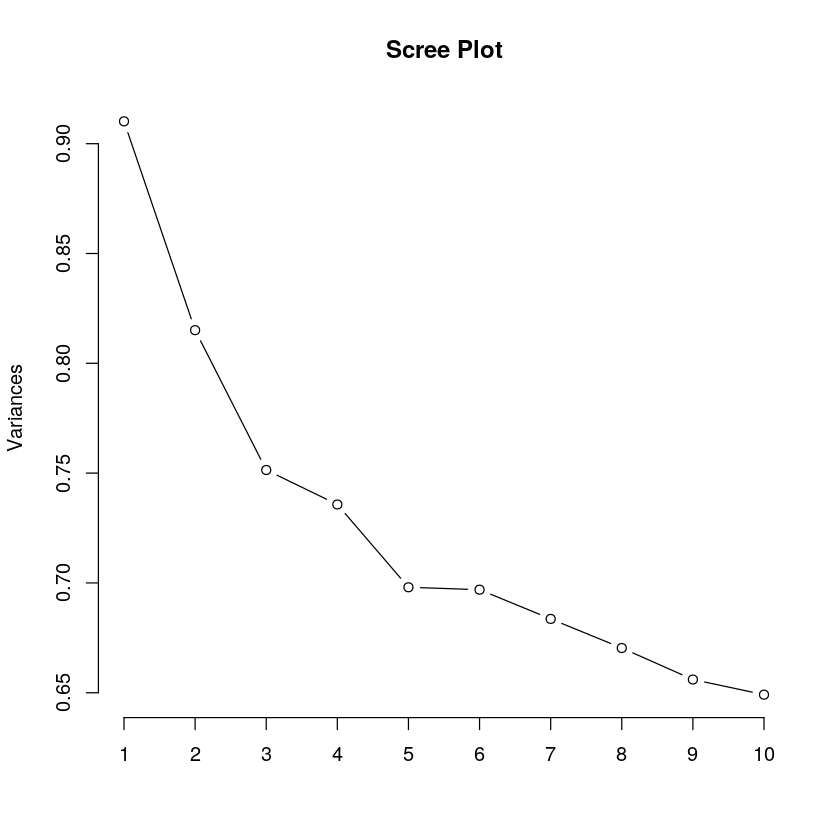

In [8]:
screeplot(pca, type='l', npcs=10, main="Scree Plot")

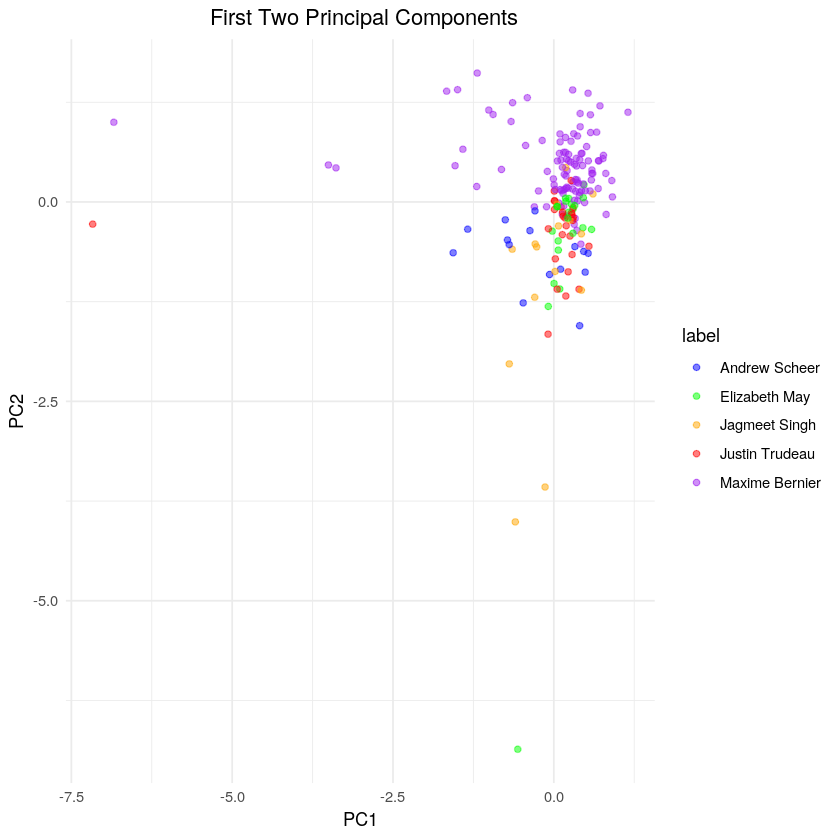

In [9]:
pca$x[,1:2] %>%
    as.data.frame() %>%
    mutate(label = factor(tweets.tokens.tfidf.df$Label)) %>%
    ggplot(aes(PC1, PC2, colour = label)) +
    geom_point(alpha = 0.5) +
    ggtitle("\t\t\tFirst Two Principal Components") +
    theme_minimal() +
    scale_color_manual(values=c("blue","green","orange","red","purple"))